In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

# cloud1 (2016 ~ 2019)

## 데이터 로드

In [18]:
input_file = r'../../data/12.rawdata_weather/asos_hour'

In [19]:
all_file_list = glob.glob(os.path.join(input_file, 'SURFACE_ASOS_129_HR_*'))
print(all_file_list)

['../../data/12.rawdata_weather/asos_hour\\SURFACE_ASOS_129_HR_2016_2016_2017.csv', '../../data/12.rawdata_weather/asos_hour\\SURFACE_ASOS_129_HR_2017_2017_2018.csv', '../../data/12.rawdata_weather/asos_hour\\SURFACE_ASOS_129_HR_2018_2018_2019.csv', '../../data/12.rawdata_weather/asos_hour\\SURFACE_ASOS_129_HR_2019_2019_2020.csv']


In [20]:
all_data = []
for file in all_file_list:
    df = pd.read_csv(file, engine='python')
    all_data.append(df)

## concat

In [21]:
df_concat = pd.concat(all_data, ignore_index=True)
df_concat.head()

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,129,2016-01-01 00:00,-3.1,NaN,0.0,0.0,97.0,4.7,-3.5,1030.3,...,NaN,NaN,300.0,NaN,19.0,-1.2,NaN,NaN,NaN,NaN
1,129,2016-01-01 01:00,-3.6,NaN,0.2,0.0,97.0,4.5,-4.0,1030.0,...,NaN,NaN,300.0,NaN,19.0,-1.6,NaN,NaN,NaN,NaN
2,129,2016-01-01 02:00,-3.9,NaN,0.0,0.0,97.0,4.4,-4.3,1030.1,...,NaN,NaN,300.0,NaN,19.0,-2.1,NaN,NaN,NaN,NaN
3,129,2016-01-01 03:00,-3.5,NaN,0.5,50.0,97.0,4.6,-3.9,1030.0,...,NaN,NaN,220.0,4.0,19.0,-2.4,NaN,NaN,NaN,NaN
4,129,2016-01-01 04:00,-3.4,NaN,0.3,0.0,97.0,4.6,-3.8,1029.5,...,Sc,10.0,300.0,NaN,19.0,-2.0,NaN,NaN,NaN,NaN


In [22]:
df_concat.shape

(34950, 27)

In [23]:
df_concat.tail()

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
34945,129,2019-12-31 19:00,-6.6,NaN,0.3,0.0,75.0,2.8,-10.3,1032.4,...,NaN,NaN,1800.0,NaN,NaN,-1.2,1.9,3.0,3.5,4.3
34946,129,2019-12-31 20:00,-6.9,NaN,0.7,90.0,76.0,2.8,-10.4,1032.2,...,NaN,NaN,1862.0,NaN,NaN,-1.4,1.6,2.8,3.4,4.3
34947,129,2019-12-31 21:00,-7.7,NaN,0.1,0.0,82.0,2.8,-10.2,1032.1,...,NaN,NaN,548.0,NaN,NaN,-1.5,1.4,2.6,3.3,4.2
34948,129,2019-12-31 22:00,-7.9,NaN,0.7,70.0,84.0,2.8,-10.1,1031.7,...,NaN,NaN,2125.0,NaN,NaN,-1.5,1.2,2.5,3.2,4.2
34949,129,2019-12-31 23:00,-6.8,NaN,0.4,0.0,81.0,3.0,-9.5,1031.5,...,NaN,NaN,1500.0,NaN,NaN,-1.4,1.2,2.3,3.1,4.2


## 시간, 운량 컬럼만 추출

In [24]:
df_concat.columns

Index(['지점', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)',
       '운형(운형약어)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)',
       '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)'],
      dtype='object')

In [25]:
cloud = df_concat[['일시', '전운량(10분위)']].copy()
cloud.head()

,일시,전운량(10분위)
0,2016-01-01 00:00,0.0
1,2016-01-01 01:00,NaN
2,2016-01-01 02:00,NaN
3,2016-01-01 03:00,0.0
4,2016-01-01 04:00,3.0


In [26]:
cloud.isnull().mean()

일시           0.000000
전운량(10분위)    0.289127
dtype: float64

In [27]:
cloud.columns = ['MEA_DDHR', 'CLOUD']

## 데이터타입 변환

In [28]:
cloud.dtypes

MEA_DDHR     object
CLOUD       float64
dtype: object

In [29]:
cloud['MEA_DDHR'] = pd.to_datetime(cloud['MEA_DDHR'])
cloud.dtypes

MEA_DDHR    datetime64[ns]
CLOUD              float64
dtype: object

## 정렬

In [30]:
def sort_by(data):
    data = data.sort_values(by='MEA_DDHR')
    data = data.reset_index()
    del data['index']
    
    return data

In [31]:
cloud = sort_by(cloud)
cloud.head()

,MEA_DDHR,CLOUD
0,2016-01-01 00:00:00,0.0
1,2016-01-01 01:00:00,NaN
2,2016-01-01 02:00:00,NaN
3,2016-01-01 03:00:00,0.0
4,2016-01-01 04:00:00,3.0


In [32]:
cloud.tail()

,MEA_DDHR,CLOUD
34945,2019-12-31 19:00:00,0.0
34946,2019-12-31 20:00:00,0.0
34947,2019-12-31 21:00:00,NaN
34948,2019-12-31 22:00:00,5.0
34949,2019-12-31 23:00:00,9.0


In [33]:
cloud[cloud['MEA_DDHR'] == '2016-04-01 01:00:00']

,MEA_DDHR,CLOUD
2185,2016-04-01 01:00:00,NaN


In [34]:
cloud = cloud.iloc[2184:, :].copy()
cloud.head()

,MEA_DDHR,CLOUD
2184,2016-04-01 00:00:00,0.0
2185,2016-04-01 01:00:00,NaN
2186,2016-04-01 02:00:00,NaN
2187,2016-04-01 03:00:00,0.0
2188,2016-04-01 04:00:00,0.0


# cloud2 (2017-11-01 04:00:00.0 ~ 2020)

## 데이터 로드

In [37]:
cloud2 = pd.read_csv('../../data/12.rawdata_weather/asos_hour/asos177_cloud.csv')
print(cloud2.shape)
cloud2.head()

(17029, 4)


,Unnamed: 0,tm,stn_id,ca
0,1,2017-11-01 04:00:00.0,177,9
1,2,2017-11-01 05:00:00.0,177,9
2,3,2017-11-01 07:00:00.0,177,7
3,4,2017-11-01 11:00:00.0,177,9
4,5,2017-11-01 11:00:00.0,177,6


## 시간, 운량 컬럼만 추출

In [38]:
cloud2 = cloud2[['tm', 'ca']]
cloud2.head()

,tm,ca
0,2017-11-01 04:00:00.0,9
1,2017-11-01 05:00:00.0,9
2,2017-11-01 07:00:00.0,7
3,2017-11-01 11:00:00.0,9
4,2017-11-01 11:00:00.0,6


In [39]:
cloud2.columns = ['MEA_DDHR', 'CLOUD']

## 데이터 타입 변환

In [40]:
cloud2.dtypes

MEA_DDHR    object
CLOUD        int64
dtype: object

In [41]:
cloud2['MEA_DDHR'] = pd.to_datetime(cloud2['MEA_DDHR'])
cloud2.dtypes

MEA_DDHR    datetime64[ns]
CLOUD                int64
dtype: object

## 정렬

In [42]:
def sort_by(data):
    data = data.sort_values(by='MEA_DDHR')
    data = data.reset_index()
    del data['index']
    
    return data

In [43]:
cloud2 = sort_by(cloud2)
cloud2.head()

,MEA_DDHR,CLOUD
0,2017-11-01 03:00:00,7
1,2017-11-01 03:00:00,9
2,2017-11-01 04:00:00,9
3,2017-11-01 04:00:00,3
4,2017-11-01 05:00:00,9


In [44]:
cloud2.tail()

,MEA_DDHR,CLOUD
17024,2020-03-31 15:00:00,8
17025,2020-03-31 16:00:00,8
17026,2020-03-31 17:00:00,9
17027,2020-03-31 18:00:00,9
17028,2020-03-31 21:00:00,6


In [45]:
cloud2[cloud2['MEA_DDHR'].duplicated(keep=False)].tail(20)

,MEA_DDHR,CLOUD
16957,2020-03-27 01:00:00,8
16958,2020-03-27 01:00:00,10
16959,2020-03-27 02:00:00,10
16960,2020-03-27 02:00:00,9
16961,2020-03-27 03:00:00,9
16962,2020-03-27 03:00:00,10
16963,2020-03-27 04:00:00,10
16964,2020-03-27 04:00:00,8
16965,2020-03-27 05:00:00,10
16966,2020-03-27 05:00:00,9


## 중복 제거

In [46]:
cloud2.drop_duplicates('MEA_DDHR', keep='first', inplace=True)

In [47]:
cloud2[cloud2['MEA_DDHR'].duplicated(keep=False)]

,MEA_DDHR,CLOUD


## 결측치 처리

In [49]:
cloud2.isnull().mean()

MEA_DDHR    0.0
CLOUD       0.0
dtype: float64

# cloud1 + cloud2 merge

- cloud1 데이터는 2016년 ~ 2019년까지 데이터 있음. 서산(stn_id=129) ASOS. 결측치 많음
- cloud2 데이터는 2017-11-01 04:00:00.0	부터 2020년까지 데이터 있음. 홍성(stn_id=177) ASOS. 결측치 없음.

In [51]:
new_cloud = cloud.merge(cloud2, on='MEA_DDHR', how='outer')
new_cloud

,MEA_DDHR,CLOUD_x,CLOUD_y
0,2016-04-01 00:00:00,0.0,NaN
1,2016-04-01 01:00:00,NaN,NaN
2,2016-04-01 02:00:00,NaN,NaN
3,2016-04-01 03:00:00,0.0,NaN
4,2016-04-01 04:00:00,0.0,NaN
...,...,...,...
34060,2020-03-31 15:00:00,NaN,8.0
34061,2020-03-31 16:00:00,NaN,8.0
34062,2020-03-31 17:00:00,NaN,9.0
34063,2020-03-31 18:00:00,NaN,9.0


## 결측치 처리

In [52]:
new_cloud.isnull().mean()

MEA_DDHR    0.000000
CLOUD_x     0.321209
CLOUD_y     0.636489
dtype: float64

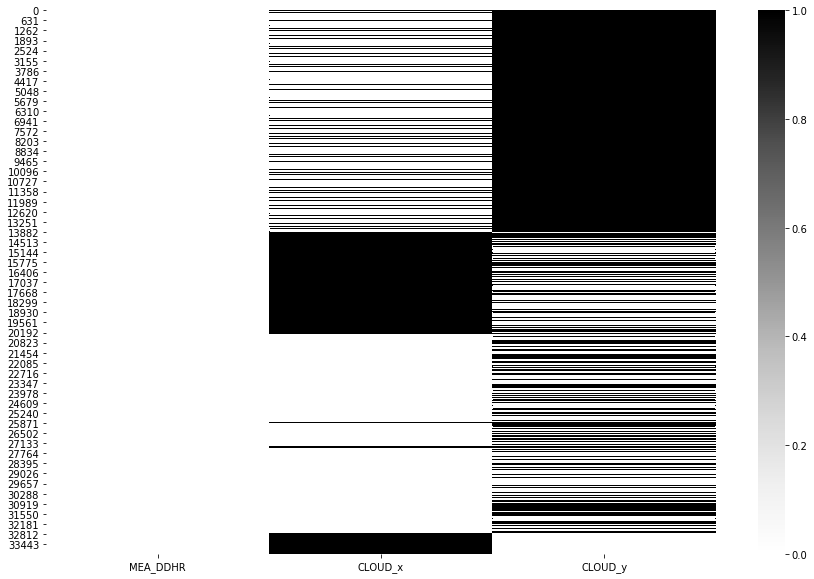

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(new_cloud.isnull(), cmap="Greys")

In [58]:
new_cloud.loc[new_cloud['CLOUD_x'].isnull(), 'CLOUD_x'] = new_cloud.loc[new_cloud['CLOUD_x'].isnull(), 'CLOUD_y']
new_cloud.isnull().mean()

MEA_DDHR    0.000000
CLOUD_x     0.169118
CLOUD_y     0.636489
dtype: float64

In [59]:
del new_cloud['CLOUD_y']
new_cloud.columns = ['MEA_DDHR', 'CLOUD']
new_cloud.head()

,MEA_DDHR,CLOUD
0,2016-04-01 00:00:00,0.0
1,2016-04-01 01:00:00,NaN
2,2016-04-01 02:00:00,NaN
3,2016-04-01 03:00:00,0.0
4,2016-04-01 04:00:00,0.0


In [60]:
new_cloud.tail()

,MEA_DDHR,CLOUD
34060,2020-03-31 15:00:00,8.0
34061,2020-03-31 16:00:00,8.0
34062,2020-03-31 17:00:00,9.0
34063,2020-03-31 18:00:00,9.0
34064,2020-03-31 21:00:00,6.0


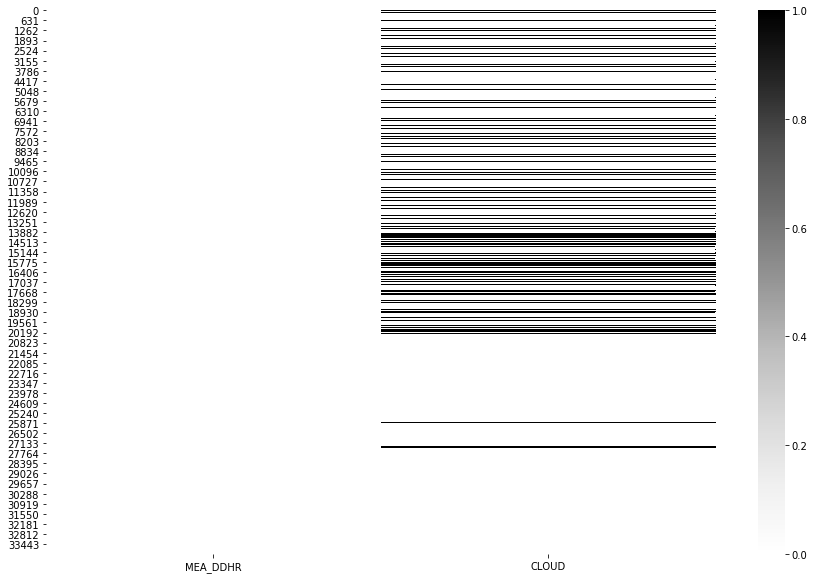

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(new_cloud.isnull(), cmap="Greys")

In [62]:
new_cloud = new_cloud.fillna(method='ffill')
new_cloud.isnull().sum().sum()

0

In [63]:
new_cloud.to_csv('../../data/22.savedata_weather/asos_cloud_merge.csv', encoding='utf-8', index=False)